# <center>Réduction de dimension</center>

# <center> Détection d'anomalie: étude de cas de détection de fraude à la carte bancaire</center>

# Partie I: Analyse exploratoire des données

## Imporatations des librairies

In [1]:
import os
import sys 

import numpy as np
import scipy.stats as stats
from scipy.stats import norm, skew
import scipy as scp

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

import seaborn as sns

import sklearn as sk
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # standardisation des variables numériques
from sklearn.preprocessing import MinMaxScaler # normalisation des variables numériques
from sklearn.preprocessing import RobustScaler # normalisation des variables numériques
from sklearn.impute import SimpleImputer # imputation des valeurs manquantes
from sklearn.impute import KNNImputer # imputation des valeurs manquantes par la méthode KNN
from sklearn.feature_selection  import SelectKBest # sélectionner 
from sklearn. preprocessing import PolynomialFeatures 

from sklearn.linear_model import LogisticRegression # régréssion logistique

from sklearn.svm import LinearSVC # machines à vecteurs de support (linéaire)
from sklearn.svm import SVC # machines à vecteurs de support (non-linéaire)
from sklearn.linear_model import SGDClassifier #  classifieurs (SVM, régression logistique, etc.) avec un algorithme SGD

from sklearn.tree import DecisionTreeClassifier # arbres classification
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.neighbors import KNeighborsClassifier # KPP voisins

from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

from sklearn.model_selection import train_test_split # séparation des données en train et test set
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyperparamètres
from sklearn.model_selection import RandomizedSearchCV # tester arbitrairement plusieurs hyperparamètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
from sklearn.metrics import accuracy_score # exactitude (accuracy)
from sklearn.metrics import f1_score # F1-score
from sklearn.metrics import confusion_matrix # matrice de confusion
# from sklearn.metrics import plot_confusion_matrix # graphique de la matrice de confusion
from sklearn.metrics import ConfusionMatrixDisplay # graphique de la matrice de confusion
from sklearn.metrics import classification_report # rapport pour le modèle de classification
from sklearn.metrics import mean_squared_error

from sklearn.metrics import auc # aire sous la courbe 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve #
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import average_precision_score

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

import warnings
warnings.filterwarnings('ignore')

# Partie I: Analyse exploratoire des données

## 1. Chargement et description des données credit card

In [2]:
data = pd.read_csv('./data/creditcard.csv')
df = data.copy()

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Dimensions
df.shape

(284807, 31)

L'ensemble de données contient $284,807$ lignes et $31$ colonnes.

In [5]:
# Vérifions les colonnes de l'ensemble de données
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

L'ensemble de données contient $31$ colonnes, seules $3$ colonnes ont du sens, à savoir le temps, le montant et la classe (fraude ou non fraude). Le reste des $28$ colonnes a été transformé en utilisant la réduction de dimension par un ACP afin de protéger les identités des utilisateurs. Toutes les colonnes transformées sont nommées $V_1$ à $V_{28}$.


In [6]:
# Quelques informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Vérifions si nous avons des valeurs manquantes dans notre ensemble de données
# df.isnull().sum()
df.isnull().values.any()

False

Nous n'avons aucune valeur manquante dans notre ensemble de données.

## 2. Analyse univariée et bivariée des variables

###  2.1. Distribution de la cible: "Class"

Notre colonne cible est 'Class' contient deux classes qui sont étiquetées fraude comme $1$ et non une fraude étiquetée comme $0$.

In [9]:
print("Nombre de transactions frauduleuses:", df['Class'].sum())

Nombre de transactions frauduleuses: 492


In [10]:
df.Class.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Nous remarquons qu'il n'y a que $0.172\%$ (total de $492$) de transactions frauduleuses et $99.82\%$ (total de 284,315 ) de transactions légitimes. Comme les données sont fortement déséquilibrées, une classe ne représentant que $0.172\%$, nous considérons qu'il s'agit d'un problème de détection d'anomalie.

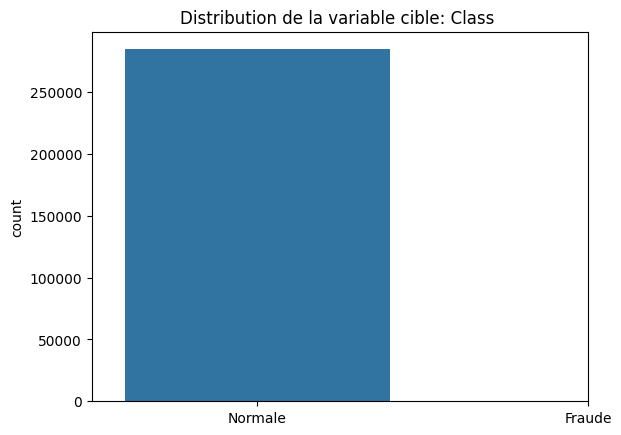

In [11]:
# Distribution de la cible
sns.countplot(df['Class'])
plt.title('Distribution de la variable cible: Class ')
plt.xticks(range(2),['Normale','Fraude'])
plt.show()

### 2.2. Distributions des variables

In [12]:
# Distribution des variables V_1, ..., V_28
features = df.columns.values[1:29]
def plot_feature_distribution(features):
    i=0
    sns.set_style('whitegrid')

    fig=plt.figure()
    ax=plt.subplots(5,6,figsize=(22,18))

    for feature in features:
        i+=1
        plt.subplot(5,6,i)
        sns.distplot(df[feature],hist=False)
        plt.xlabel(str(feature),)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

<Figure size 640x480 with 0 Axes>

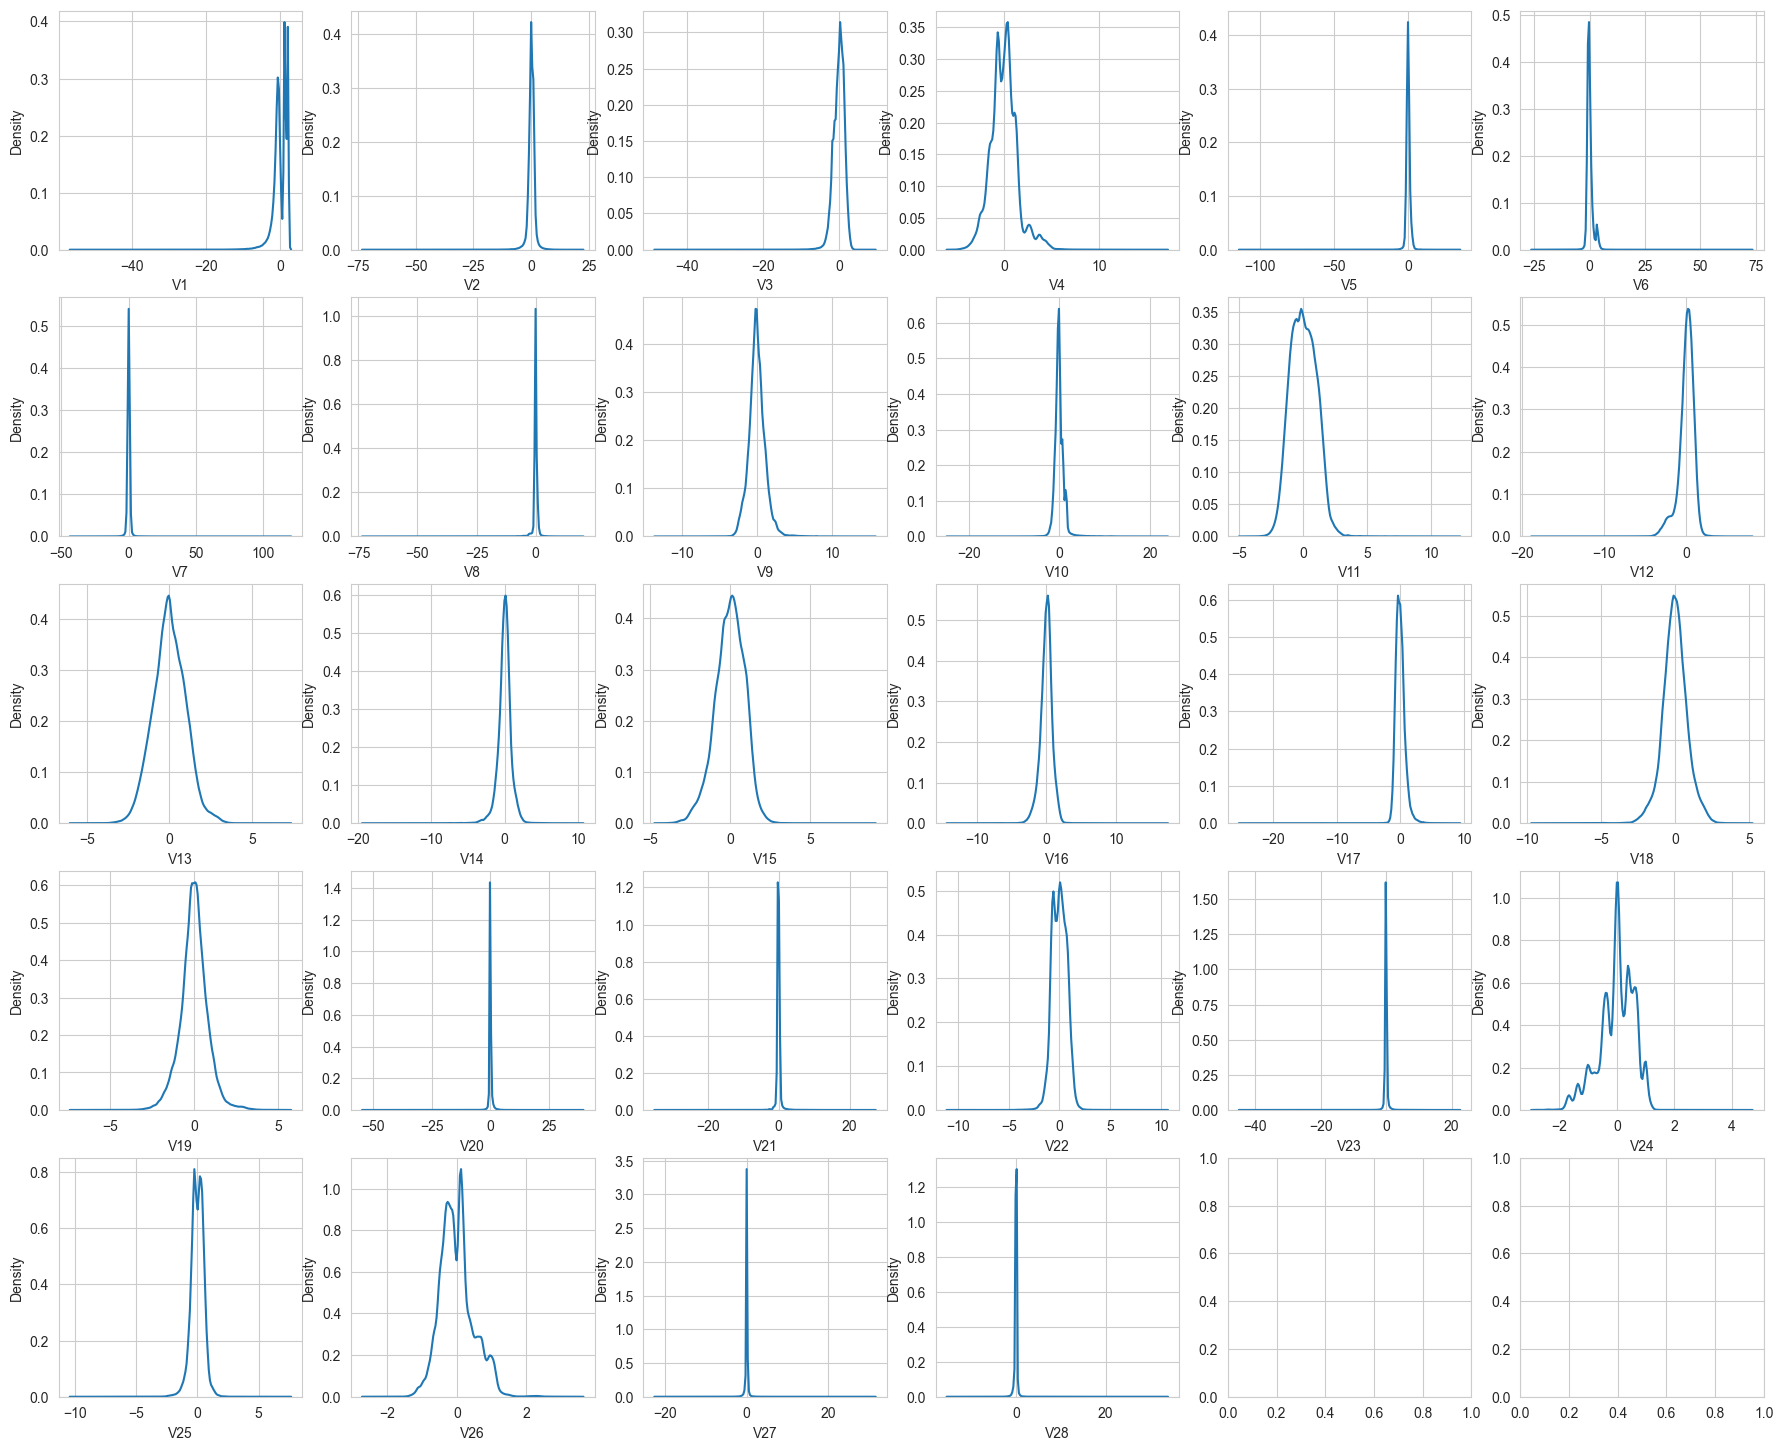

In [13]:
plot_feature_distribution(features)
plt.show()

Les variables $V_1, \ldots, V_{28}$ sont centrées et réduites (standardisées). Ceci est attendu car elles représentent les composantes principales d'un ACP sur des variables d'origine pour des raisons de confidentialité.

### 2.3. Distribution des variables: "Time" et "Amount"

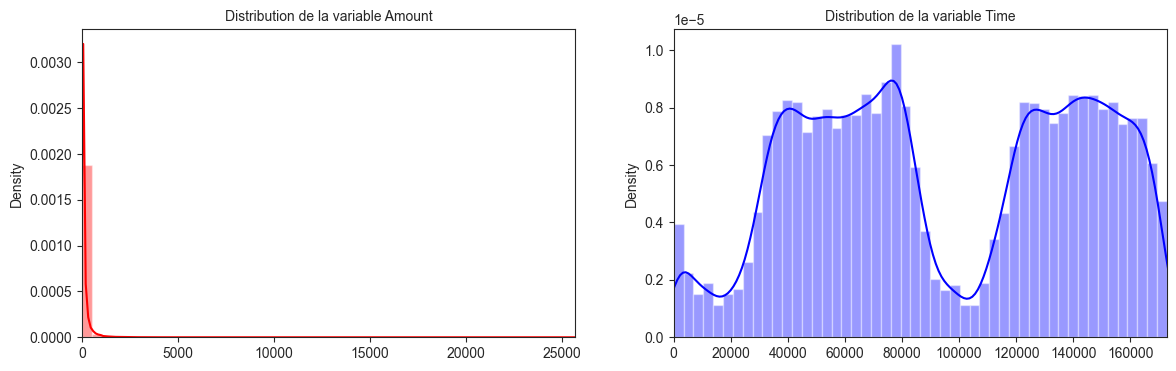

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution de la variable Amount', fontsize=10)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution de la variable Time', fontsize=10)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Puisque seules les variables "Temps" et "Montant" sont facilement interprétables, nous pouvons utiliser certaines visualisations pour voir leurs impacts sur la variable cible (la fraude). Premièrement, les fraudes se produisent-elles davantage sur les petites ou les grosses transactions?

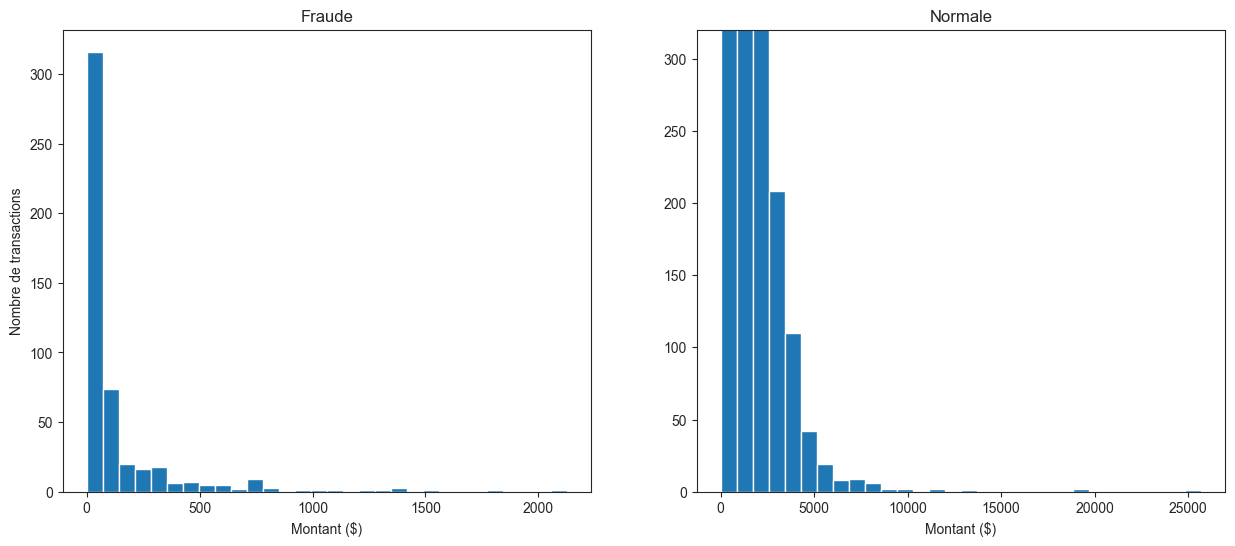

In [15]:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30

ax1.hist(df_fraud['Amount'], bins=bins)
ax2.hist(df_normal['Amount'], bins=bins)

ax1.set_title('Fraude')
ax2.set_title('Normale')

ax1.set_xlabel('Montant (\$)')
ax2.set_xlabel('Montant (\$)')
ax1.set_ylabel('Nombre de transactions')

ax2.set_ylim(0, 320)
plt.show()

Le nombre de transactions est très différent car il y a beaucoup plus de transactions normales que de fraudes. Nous pouvons simplement voir les différences entre les graphiques. En les regardant, nous pouvons voir que la plupart des fraudes se produisent sur de petites transactions $(\approx 500\$).$

L'unité de la variable `Time` est en seconde. Nous allons la convertir en heure.

In [16]:
# Changement de la variable Time 
df["Time"] = df["Time"].apply(lambda x : x / 3600 % 24)
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

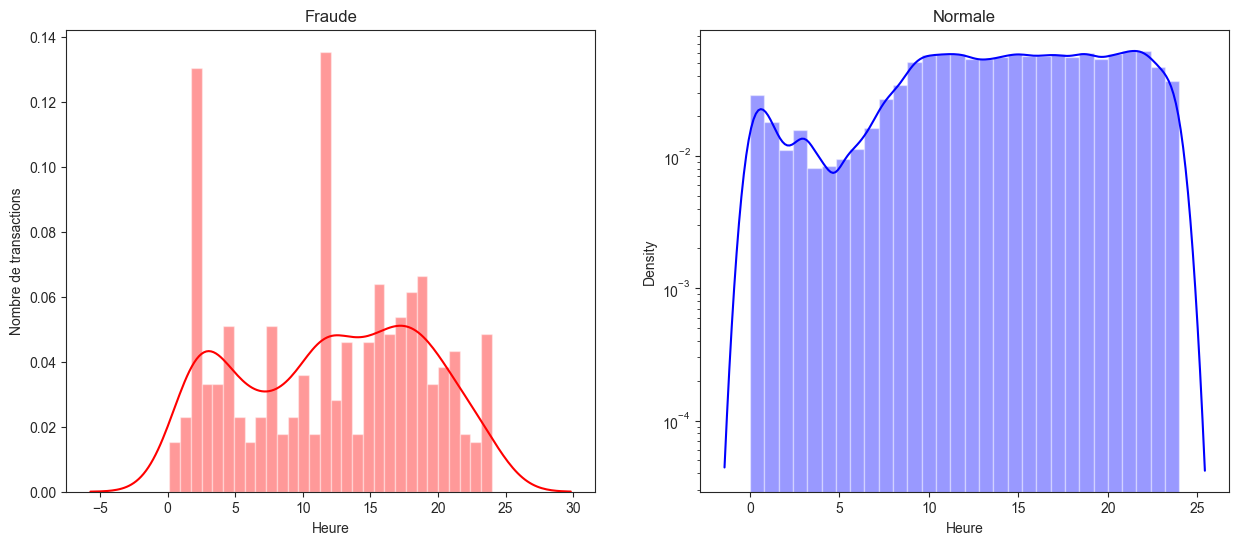

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30

# ax1.hist(df_fraud['Time'], bins=bins)
sns.distplot(df_fraud['Time'], ax=ax1, color='r', bins=bins)
sns.distplot(df_normal['Time'], ax=ax2, color='b', bins=bins)

ax1.set_title('Fraude')
ax2.set_title('Normale')

ax1.set_xlabel('Heure')
ax2.set_xlabel('Heure')
ax1.set_ylabel('Nombre de transactions')

ax2.set_yscale('log')
plt.show()

La variable `Time` peut être très instructive, sur les graphiques ci-dessus nous pouvons voir que la plupart des fraudes se produisent à $\approx 2h$ (matin) et $\approx 12h$ (midi).

### 2.4. Analyse bivariée

#### Matrice de corrélation

Nous pouvons observer si les variables de l'ensemble de données sont corrélées les unes aux autres en utilisant le diagramme de carte thermique implémenté dans la bibliothèque seaborn.

In [18]:
correlation_matrix = df.corr()

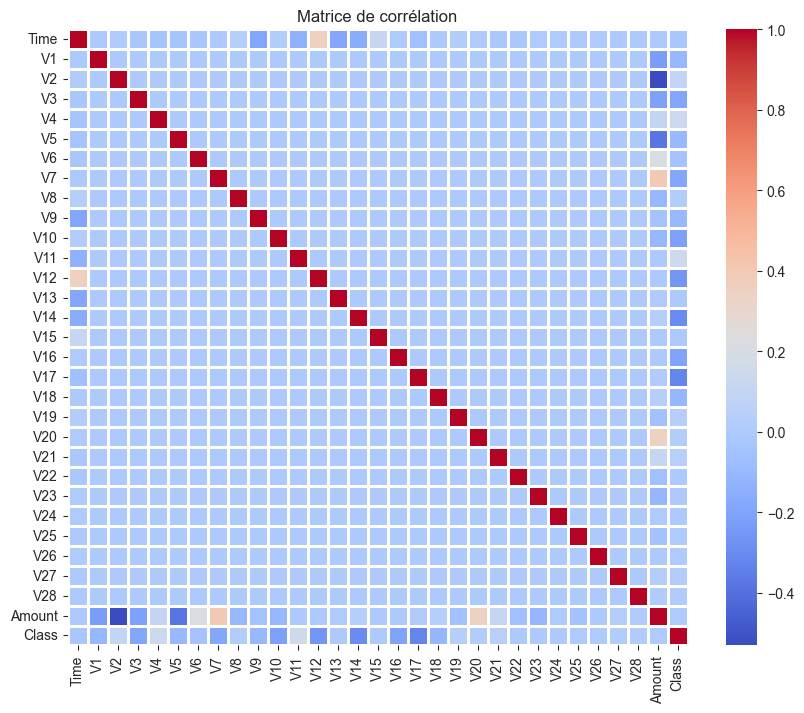

In [19]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = "coolwarm", linewidth = 2, linecolor = "white")  # 'BuPu'
plt.title("Matrice de corrélation")
plt.show()

Nous pouvons voir quelques faibles corrélations entre= `(V_2, Amount)` (négative); `(V_12, time)` (positive), parmi d'autres.

#### Distributions conditionnelles 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

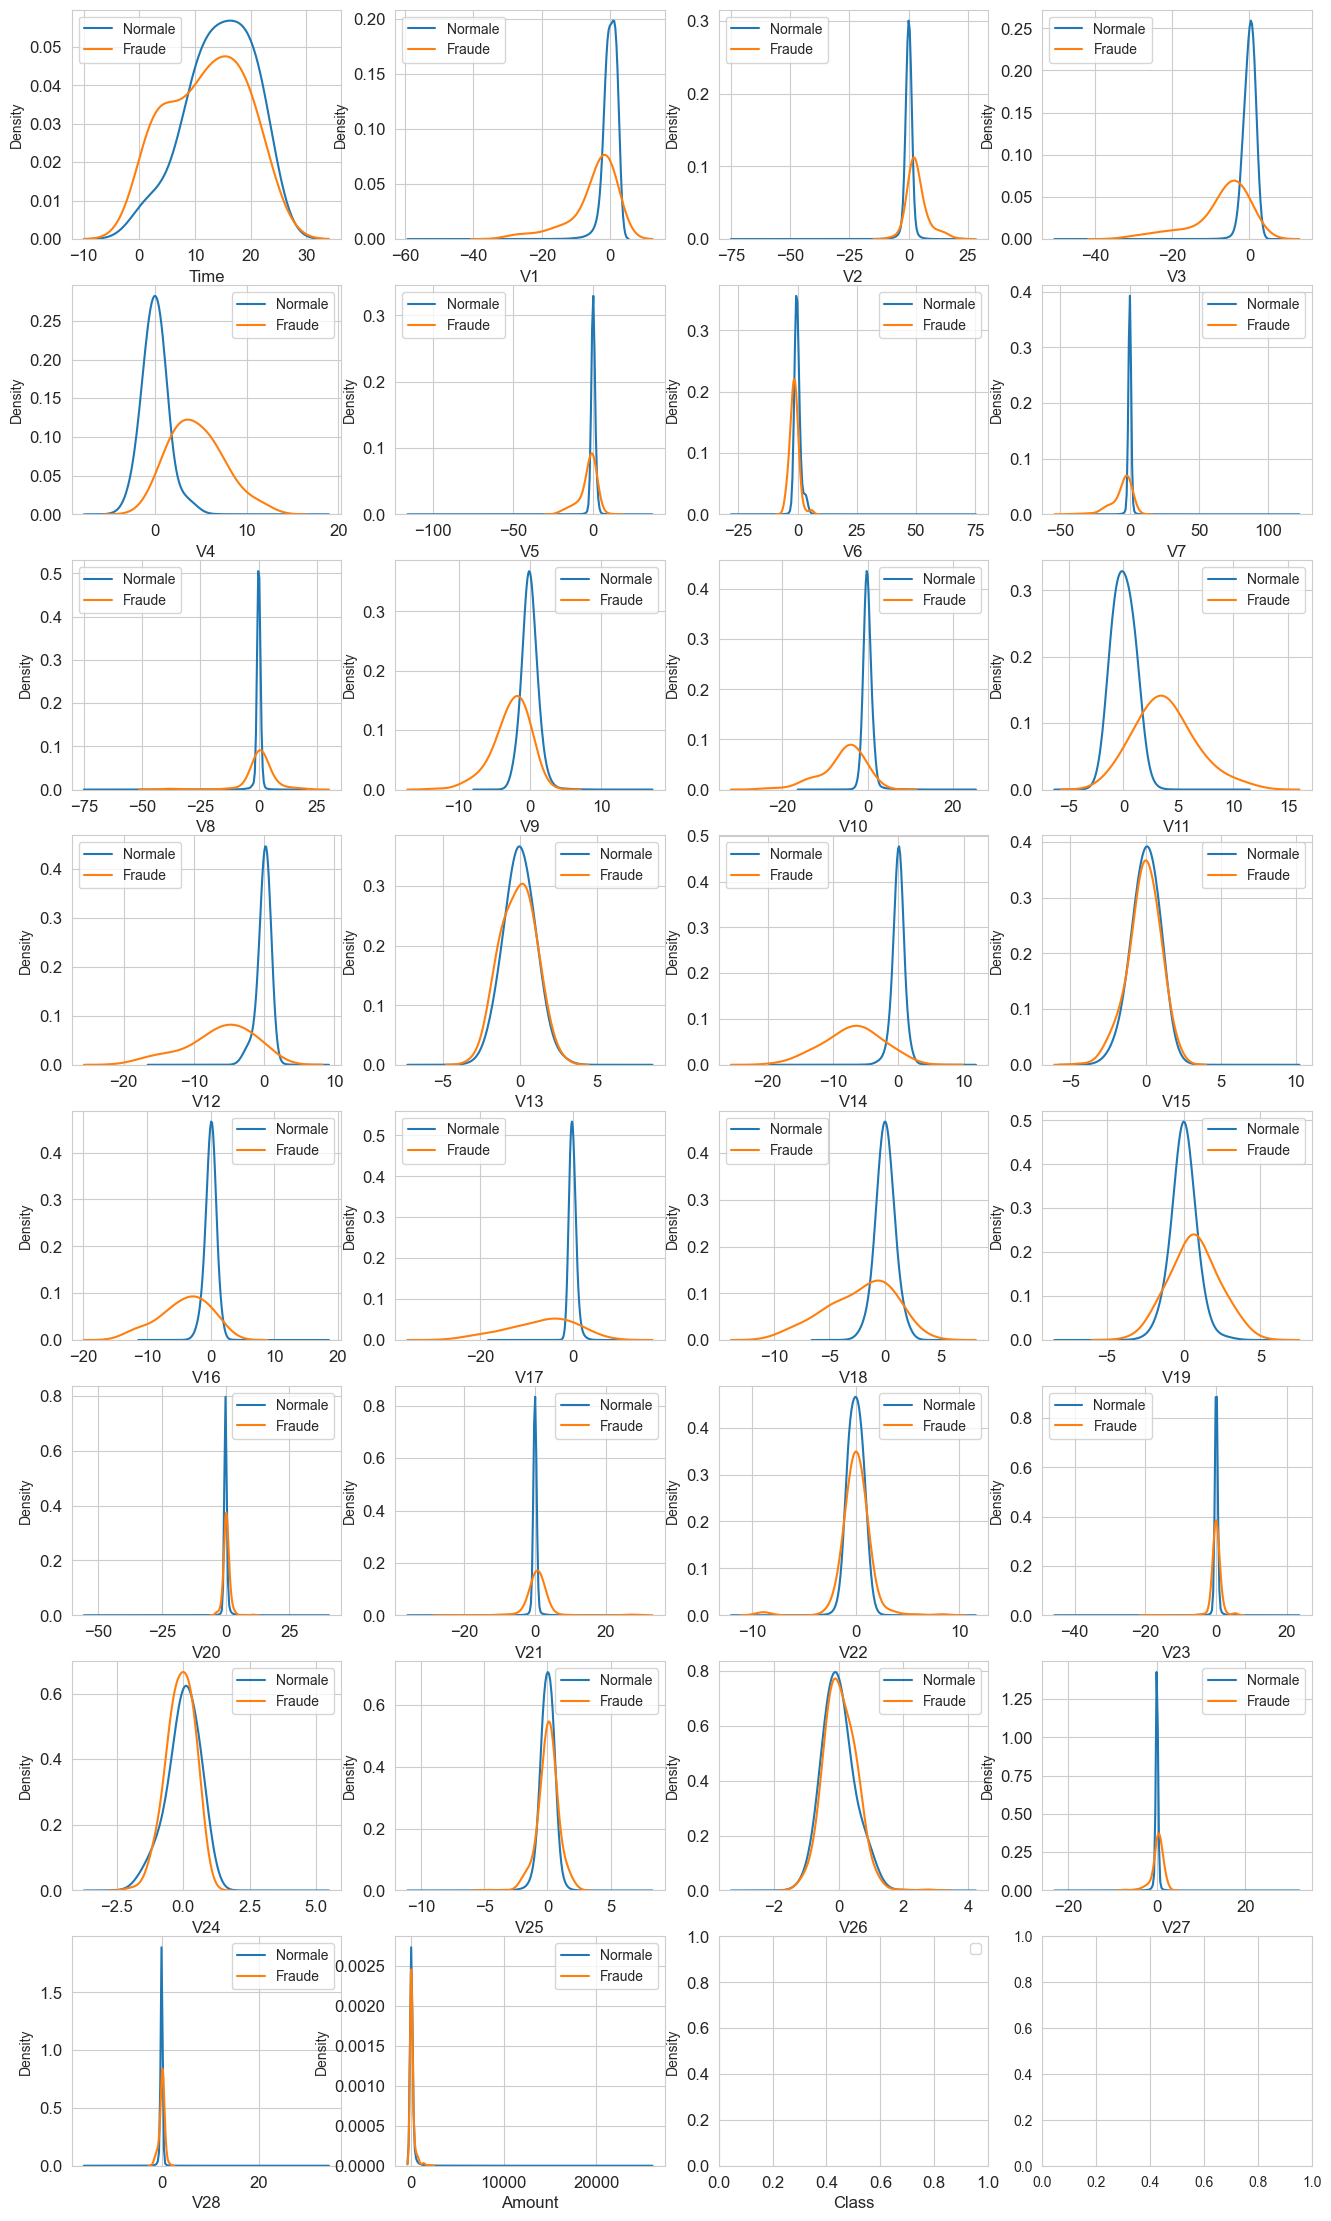

In [20]:
var = df.columns.values

i = 0
df_normal_features = df.loc[df['Class'] == 0]
df_frod_features = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(df_normal_features[feature], bw=0.5, label="Normale")
    sns.kdeplot(df_frod_features[feature], bw=0.5, label="Fraude")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()
plt.show();

Nous pouvons voir sur le graaphique précédent qu'il ya des différences significatives dans les distributions conditionnelles:
$\mathbb{P}[X_j | Y = 0] \neq \mathbb{P}[X_j | Y = 1]$, par exemple $X_j =\text{Time}$, `V_1, V_2, V_3, V_4, V_11`. Ce qui n'est pas le cas pour les variables `V_24, V_25, V_26`

# Partie II: Pré-traitement de données

Puisque nous allons appliquer une ACP sur les données, nous savons très bien que le premier pré-traitement à faire c'est de standardiser les features. 
La fonction `preprocessing` suivante, nous adoptons la supression de la variable `Time`et `Amount`.

## 1. Standariser les variables

In [21]:
def preprocessing(df):
    X = df.drop('Class', axis=1)
    X = X.drop('Time', axis=1)
    X = X.drop('Amount', axis=1)
    y = df['Class'] # vecteur des lables
    features = X.columns
    scaler = StandardScaler()
    X.loc[:, features] = scaler.fit_transform(X.loc[:, features])
    return X, y

##  2. Séparation données de train et test 

In [22]:
# labels = df.loc[:,'Class']
# df_train, df_test = train_test_split(df, test_size=0.33, stratify=labels, random_state=0)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [23]:
df_train.shape, df_test.shape

((227845, 31), (56962, 31))

In [24]:
df_train['Class'].value_counts()

Class
0    227454
1       391
Name: count, dtype: int64

In [25]:
df_test['Class'].value_counts()

Class
0    56861
1      101
Name: count, dtype: int64

In [26]:
X_train, y_train = preprocessing(df_train)

In [28]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
68806,0.039210,-0.571779,0.628284,0.529475,-0.749479,0.025137,0.644192,-0.500959,-2.679209,1.400009,-0.750081,-1.279669,0.109400,-0.862741,-0.076248,0.989869,-1.964754,0.937706,-0.007192,2.400388,-0.845458,4.094571,-0.742969,0.053657,-1.281474,0.202898,-0.892783,0.573778,-0.219661,-0.041461
40018,-0.582526,0.626792,-0.083622,0.313696,-0.118269,-0.330793,-0.142567,-0.289639,0.041441,0.117241,-0.014656,0.883497,0.835929,0.469606,0.195366,0.652864,1.054528,-1.099405,0.314751,0.614141,0.040144,-0.233752,-0.791286,0.059559,-0.503033,0.140397,1.682652,-0.170915,0.006314,-0.041461
250360,0.766626,0.983612,-0.119873,-0.188282,1.126637,-0.356708,-0.233994,-0.247117,0.030587,1.183060,0.005121,-1.368314,0.319441,-1.038712,-0.104181,-1.180281,-0.510432,0.064396,-1.042327,0.178306,-0.466730,-0.716790,-1.722299,0.731669,-0.200271,-0.694476,-2.279759,0.132840,-0.101283,-0.041461
234820,0.446734,1.045028,0.119454,-1.124173,0.373420,0.131198,-1.087195,0.208774,-0.302279,0.548164,-0.439638,-0.307183,0.037586,-0.097239,-0.738189,1.042705,0.169361,0.538064,0.504411,-0.618984,-0.285042,0.272289,1.041614,-0.021385,-0.132182,0.450457,-0.202445,0.001499,-0.098331,-0.041461
10001,-1.772136,-0.429614,0.627754,1.540937,2.190580,0.169007,0.378586,0.256827,-0.132910,0.372422,0.813889,1.715376,-2.538114,0.781713,1.412719,-1.301130,-0.412677,0.911908,0.602738,1.682228,-0.178221,-0.493641,-0.630795,0.263811,0.385747,-0.804336,-0.152495,-0.883401,-0.528391,-0.041461


In [30]:
X_train.shape

(227845, 30)

In [31]:
# Petite vérification pour la standardisation
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05
mean,6.995655e-17,2.738074e-17,-1.122673e-17,5.769291e-18,3.679872e-18,5.613364e-19,4.553062e-18,5.738105e-18,2.182975e-18,1.584216e-17,2.713126e-18,9.979314e-18,-1.565505e-17,7.983451e-18,-1.543675e-18,-1.496897e-18,1.434526e-17,3.180906e-18,7.297373e-18,-1.620079e-17,-3.399204e-18,-5.301510e-19,5.519808e-18,9.199680e-19,-1.116436e-17,-2.245346e-18,-1.958440e-17,-6.174700e-18,3.679872e-18,1.116436e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.485256e+00,-2.396508e+01,-3.839791e+01,-2.222994e+01,-4.013325e+00,-3.085465e+01,-1.771386e+01,-3.554749e+01,-6.073415e+01,-1.221311e+01,-2.253690e+01,-4.704135e+00,-1.859232e+01,-5.808286e+00,-2.009067e+01,-4.915820e+00,-1.613287e+01,-2.959863e+01,-1.133825e+01,-8.850655e+00,-3.091829e+01,-4.722217e+01,-1.504527e+01,-7.191368e+01,-4.664673e+00,-1.976750e+01,-5.403073e+00,-5.621693e+01,-3.651065e+01,-4.146117e-02
25%,-6.737678e-01,-4.719721e-01,-3.625796e-01,-5.893886e-01,-5.991027e-01,-5.065089e-01,-5.791357e-01,-4.514451e-01,-1.723637e-01,-5.859075e-01,-4.909425e-01,-7.476650e-01,-4.076842e-01,-6.519291e-01,-4.452430e-01,-6.380280e-01,-5.345589e-01,-5.696443e-01,-5.948665e-01,-5.603822e-01,-2.788507e-01,-3.103674e-01,-7.478889e-01,-2.591838e-01,-5.862543e-01,-6.083230e-01,-6.786350e-01,-1.748961e-01,-1.643949e-01,-4.146117e-02
50%,8.110198e-02,9.695038e-03,3.931025e-02,1.178892e-01,-1.318079e-02,-3.938697e-02,-2.064843e-01,3.297010e-02,1.900019e-02,-4.576035e-02,-8.560988e-02,-3.234718e-02,1.404735e-01,-1.419938e-02,5.202937e-02,5.342170e-02,7.662412e-02,-7.831881e-02,-4.252403e-03,4.872993e-03,-8.394176e-02,-3.964244e-02,9.178763e-03,-1.707334e-02,6.687371e-02,3.309610e-02,-1.076042e-01,4.147769e-03,3.524984e-02,-4.146117e-02
75%,8.196328e-01,6.720033e-01,4.870030e-01,6.782072e-01,5.248248e-01,4.479397e-01,3.002480e-01,4.654719e-01,2.714287e-01,5.434759e-01,4.175869e-01,7.257104e-01,6.203925e-01,6.654346e-01,5.153371e-01,7.090182e-01,5.970916e-01,4.698414e-01,5.973808e-01,5.637946e-01,1.720781e-01,2.533117e-01,7.287247e-01,2.374007e-01,7.256773e-01,6.730552e-01,5.009411e-01,2.269673e-01,2.440434e-01,-4.146117e-02
max,1.618390e+00,1.252497e+00,1.337154e+01,6.193867e+00,1.191381e+01,2.496490e+01,1.803291e+01,3.595395e+01,1.659766e+01,1.417768e+01,2.176142e+01,1.178759e+01,7.866143e+00,4.580486e+00,1.100527e+01,6.363939e+00,8.060043e+00,1.082907e+01,6.018652e+00,6.836040e+00,5.153661e+01,3.688029e+01,1.445265e+01,3.615739e+01,6.645299e+00,1.443722e+01,7.187237e+00,3.027697e+01,7.052304e+01,2.411895e+01


In [32]:
X_test, y_test = preprocessing(df_test)

# Partie III: Modélisation + Évaluation

## Approche non supervisé de classification

L'idée principale de la réduction de la dimension est de transformer ou compresser les données d'origines (après pré-traitement) 
en faisant une **représentation latente**, puis de reconstruire les données: 
- Si un échantillon est similaire au reste de l'ensemble de données, les données reconstruites seront similaires ou même égales aux données originales. 
- En revanche, si l'échantillon n'est pas similaire au reste, l'échantillon reconstruit ne sera pas similaire à l'échantillon original.
En bref, nous compressons les données et les reconstruisons: si les données reconstruites ne sont pas similaires aux données originales, nous avons une fraude.

Cette approche de classification est dite non supervisé car les labels seraient utilisés que pour évaluer l'algorithme. Les labels nous aideront uniquement à comprendre à quel point ces solutions sont efficaces à avoir des modèles connus de fraude.

### 1. Score d'anomalie: fonction calculant l'erreur de reconstruction

Les algorithmes de réduction de la dimension réduisent la dimension des données tout en essayant de minimiser l'erreur de reconstruction. En d'autres termes, ces algorithmes essaient de capturer les informations les plus importantes des variables originales de manière à pouvoir reconstruire l'ensemble de ces variables d'origine à partir de l'ensemble réduit de variables possibles.

Nous allons définir une fonction qui calcule le score d'anomalie de chaque transaction. Plus la transaction est anormale, plus il est probable qu'elle soit frauduleuse, en supposant que la fraude est rare et a une apparence quelque peu différente de la majorité des transactions, qui sont normales.

In [33]:
# Calculer l'erreur de reconstruction
def anomaly_scores(x_original, x_reconstructed):
    loss = np.sum((np.array(x_original) - np.array(x_reconstructed))**2, axis=1)
    loss = pd.Series(data=loss, index=x_original.index)
    loss = (loss - np.min(loss)) / (np.max(loss) - np.min(loss)) # loss entre 0. et 1.
    return loss

La fonction `anomaly_scores` définit le score d'anomalie comme l'erreur de reconstruction pour chaque transaction $\boldsymbol{\vec{x}}_i \in \mathbb{R}^{30}$ comme  la somme des différences au carré entre la transaction d'origine $\boldsymbol{\vec{x}}_i$ et la transaction reconstruite $\widehat{\boldsymbol{\vec{x}}}_i \in \mathbb{R}^{30}$ à l'aide de l'algorithme de réduction de la dimension. Nous allons mettre à l'échelle la somme des différences au carré par la quantité maximale-minimale de la somme des différences au carré pour l'ensemble de données, de sorte que toutes les erreurs de reconstruction soient comprises entre $0$ et $1$.

Les transactions qui présentent la plus grande somme de différences au carré auront une erreur proche de $1$ (le plus susceptible d'être frauduleux), tandis que celles qui présentent la plus petite somme de différences au carré auront une erreur proche de $0$.

## 2. Métrique d'évaluation

### 2.1.  Métrique standards

Les classifieurs binaires sont couramment évalués à l'aide de mesures de performance telles que:

#### 2.1.1.  Recall/Rappel

<span style="background-color: #FFFF00">Recall</span>: le recall (la sensibilité): le taux de vrais positifs, c'est à dire la proportion d'exemple positifs correctement classés. Le recall mesure quelle fraction de vrais positifs le modèle a identifiée.

**RECALL = True Positive / (True Positive + False Negative) = Nombre de vrais positifs / Toutes les données positives**

Parmi les transactions frauduleuses, combien en avons-nous repérées?

#### 2.1.2.  Précision
<span style="background-color: #FFFF00">Précision</span>:
Quant à al précision détermine la proportion de prédictions correctes parmi les prédictions positives. Elles mesure à quel point nos prédictions positive sont exactes.

**PRECISION = True Positive / (True Positive + False Positive) = Nombre de vrais positifs / Toutes les prédictions positives**

Parmi les transactions qui ont été signalées comme frauduleuses par le modèle, combien étaient réellement frauduleuses?


#### 2.1.3.  Spécifité

<span style="background-color: #FFFF00">Spécifité</span>: La spécifité est le taux de vrais négatifs, c'est à dire la proportion d'exmeples négatifs correctement identifiées. Elle mesure quelle fraction de vrais négatifs le modèle a identifiée.

**SPECIFITY = True Négatives / (True Negative + False positive) = Nombre de vrais négatifs / Toutes les données négatives**

#### 2.1.4.  Courbe ROC
<span style="background-color: #FFFF00">Courbe ROC</span>: la courbe ROC trace le RECALL (taux de vrais positifs) sur l'axe des ordonnées et $(1-$ SPECIFITY) (le taux de faux positifs) sur l'axe des abscisses. Plus la courbe est proche du coin supérieur gauche du graphique, meilleure est la solution - avec une valeur de $(0,0), (1,0)$ comme point optimal absolu, signifiant un taux de faux positifs de $0 %$ et un taux de vrais positifs de $100\%.$ positifs. Pour évaluer la solution, nous pouvons calculer l'aire sous cette courbe (AUC-ROC). Plus l'AUC-ROC, plus la solution est bonne.

### 2.2. Cas des données fortement déséquilibrées

Les données ds transactions sont fortement déséquilibrés dans lesquels le nombre de négatifs (transactions normales) l'emporte largement sur le nombre de positifs (transactions frauduleuses). Bien que les courbes ROC soient visuellement attrayants et fournissent une vue d'ensemble des performances d'un classifieur sur une large gamme de spécificités, on peut se demander si les courbes ROC ne sont pas faussés lorsqu'ils sont appliqués à des scénarios de classification déséquilibrée.

### 2.2.1. Courbe et aire  Précision/Recall: PRC (Precision Recall Curve) et AU-PRC

Pour notre jeu de données déséquilibré sur les transactions, une meilleure façon d'évaluer les résultats est d'utiliser la précision et le rappel. En effet: 
- Une précision élevée signifie que parmi toutes nos prédictions positives, beaucoup sont de vrais positifs (autrement dit, le taux de faux positifs est faible). 
- Un rappel élevé signifie que le modèle a capturé la plupart des vrais positifs (en d'autres termes, il a un faible taux de faux négatifs).

En d'autres termes: 

- Une solution avec un rappel élevé mais une précision faible renvoie de nombreux résultats - capturant de nombreux positifs, mais avec de nombreuses fausses alarmes. 

- Une solution avec une précision élevée  mais un rappel faible est exactement l'inverse ; elle renvoie peu de résultats - elle capture une fraction de tous les positifs de l'ensemble de données, mais la plupart de ses prédictions sont correctes.

**Résumé** 

Si la solution avait une grande précision mais un faible rappel, un très petit nombre de transactions frauduleuses seraient découvertes, mais la plupart seraient réellement frauduleuses.

En revanche, si la solution avait une faible précision mais un rappel élevé, elle signalerait de nombreuses transactions comme étant frauduleuses, ce qui permettrait de détecter une grande partie de la fraude, mais la plupart des transactions signalées ne seraient pas frauduleuses.

De toute évidence, les deux solutions présentent des problèmes majeurs. Dans le cas d'une précision élevée et d'un rappel faible, la société de cartes de crédit perdrait beaucoup d'argent à cause de la fraude, mais elle ne se mettrait pas les clients à dos en rejetant inutilement des transactions. Dans le cas d'une précision faible et d'un rappel élevé, la société de cartes de crédit détecterait une grande partie de la fraude, mais elle mettrait très certainement les clients en colère en rejetant inutilement un grand nombre de transactions normales et non frauduleuses.

Il existe généralement un compromis entre la précision et le rappel, qui est habituellement déterminé par le seuil fixé par l'algorithme pour séparer les cas positifs des cas négatifs ; dans notre exemple, un cas positif est une fraude et un cas négatif n'est pas une fraude. Si le seuil est trop élevé, très peu de cas sont prédits comme positifs, ce qui entraîne une précision élevée mais un rappel faible. Lorsque le seuil est abaissé, davantage de cas sont prédits comme positifs, ce qui diminue généralement la précision et augmente le rappel.

**Choix du seuil**

Le choix du seuil est très important et implique généralement la participation des décisionnaires de l'entreprise. Les spécialistes des données peuvent présenter la courbe précision-rappel à ces décideurs pour déterminer le seuil à retenir.


**Solution optimale = Maximisr la Précision et le recall au même temps** 

Une solution optimale doit avoir une précision élevée et un rappel élevé, en rejetant uniquement les transactions qui sont réellement frauduleuses (précision élevée) et en détectant la la plupart des cas frauduleux de l'ensemble de données (rappel élevé).


**Courbe Precision/Recall**

Dans notre cas des transactions, nous pouvons trouver le modèle qui présente le meilleur rapport précision/rappel. Pour cela, nous utilisons le graphique du compromis entre la précision et le rappel est connu sous le nom de courbe précision-rappel. Pour évaluer la courbe précision-rappel, nous pouvons calculer la précision moyenne, qui est la moyenne pondérée de la précision obtenue à chaque seuil. Plus la précision moyenne est élevée, meilleure est la solution.

Les courbe PRC peuvent fournir à l'observateur une prédiction précise des performances de classification futures, car ils évaluent la fraction de vrais positifs parmi les prédictions positives. L'AUC-PRC : aire normalisée sous la courbe paramétrique définie par la Précision et le Rappel en fonction du seuil de décision.

### 3. Fonctions de visualition des résultats des courbes PRC et l'aire AU-PRC

In [34]:
def plotResults(labels, anomaly_scores, returnPreds=False):
    df_preds = pd.concat([labels, anomaly_scores], axis=1)
    df_preds.columns = ['Labels', 'AnomalyScores']
    
    ############################
    ## Courbe PRC et aire AU-PRC
    ############################
    precision, recall, thresholds = precision_recall_curve(df_preds['Labels'], df_preds['AnomalyScores'])
    average_precision = average_precision_score(df_preds['Labels'], df_preds['AnomalyScores'])
    
    # print(precision.shape, recall.shape, thresholds.shape)
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Courbe Precision-Recall: Moyenne de précision = \
    {0:0.2f}'.format(average_precision))
    
    #############
    ## Courbe ROC
    ##############
    fpr, tpr, thresholds = roc_curve(df_preds['Labels'], df_preds['AnomalyScores'])
    areaUnderROC = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='Courbe ROC')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs (FPR)')
    plt.ylabel('Taux de vrais positifs (TPR)')
    plt.title('Courbe ROC: Aire sous la courbe ROC = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return df_preds

La fonction `scatterPlot` affiche la séparation des points que l'algorithme ACP réalise dans les deux premières composantes seulement.

In [35]:
# Visualiser les premières compsantes principales de l'ACP
def scatterPlot(X, y):
    temp = pd.DataFrame(data=X.loc[:,0:1], index=X.index)
    temp = pd.concat((temp,y), axis=1, join="inner")
    temp.columns = ["PC1", "PC2", "Label"]
    sns.lmplot(x="PC1", y="PC2", hue="Label", data=temp, fit_reg=False)
    ax = plt.gca()

### 4. ACP: Analyse en composante principale

#### 4.1. Composantes PCA égale au nombre original de la dimension: `n_components=30`

In [36]:
n_components = 30
random_state = 0

pca = PCA(n_components=n_components, random_state=random_state)

X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)

In [37]:
X_train_pca.shape

(227845, 30)

In [38]:
X_train_pca_inverse = pca.inverse_transform(X_train_pca)
X_train_pca_inverse = pd.DataFrame(data=X_train_pca_inverse, index=X_train.index)

In [39]:
X_train_pca_inverse.shape

(227845, 30)

In [40]:
anomalyScores = anomaly_scores(X_train, X_train_pca_inverse)
# anomalyScores.shape

In [41]:
anomalyScores.head()

68806     0.183971
40018     0.024816
250360    0.101031
234820    0.005163
10001     0.340653
dtype: float64

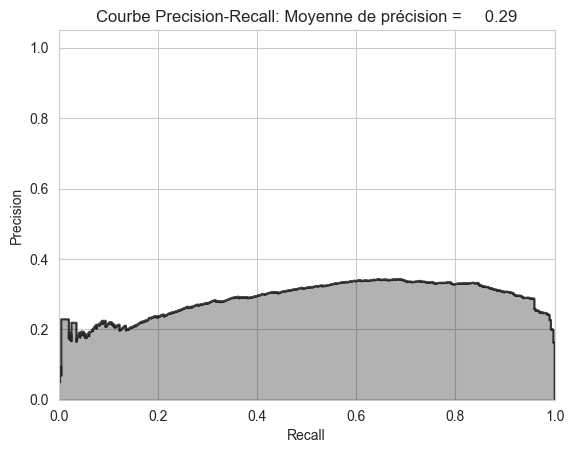

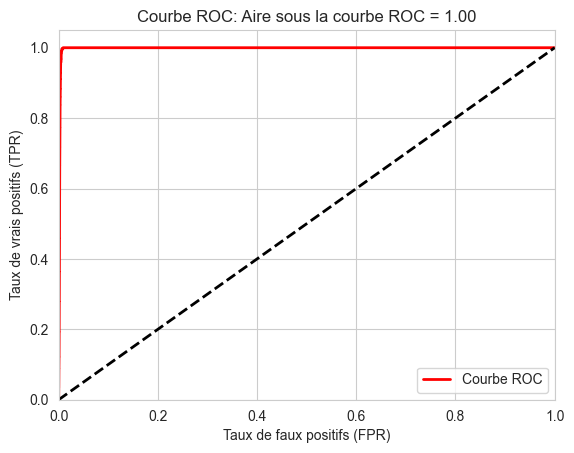

In [42]:
preds = plotResults(y_train, anomalyScores)

Lorsque le nombre de composantes principales est égal au nombre de dimensions d'origine, l'ACP capture presque $100 \%$ de la variance/information des données lorsqu'elle génère les composantes principales. Par conséquent, lorsque l'ACP reconstruit les transactions à partir des composantes principales, l'erreur de reconstruction sera trop faible pour toutes les transactions, frauduleuses ou non. Nous ne serons pas en mesure de faire la différence entre les transactions rares et les transactions normales - en d'autres termes, la détection des anomalies sera faible.

Avec `n_components=30`, nous avons une précision moyenne de $23\%$, il s'agit d'une mauvaise solution de détection des fraudes . Elle détecte très peu de fraude.

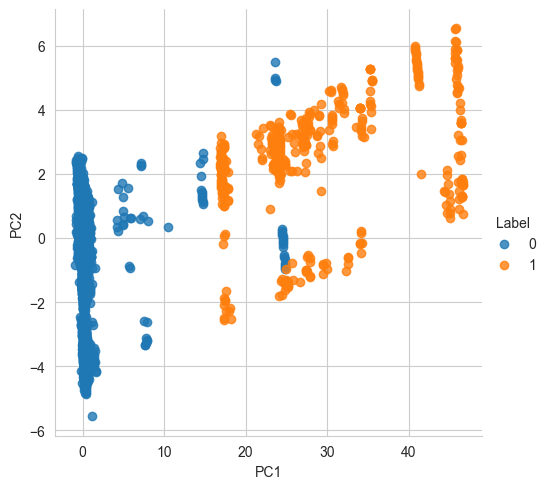

In [43]:
scatterPlot(X_train_pca, y_train)

#### 4.2. Composantes PCA égale au nombre original de la dimension: `n_components=10`

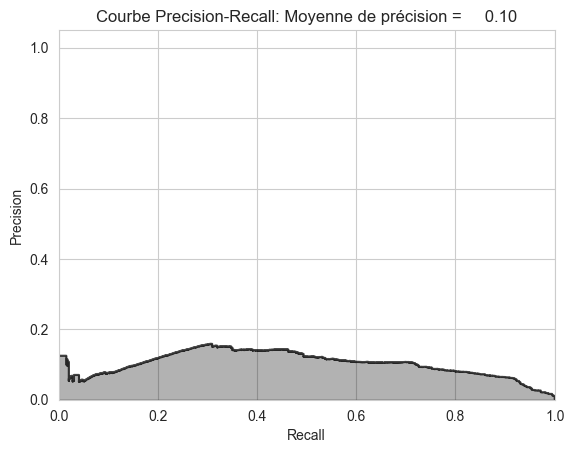

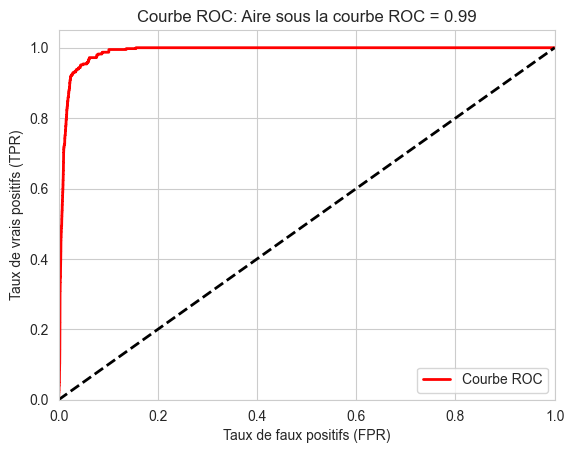

In [44]:
n_components = 10
random_state = 0

pca = PCA(n_components=n_components, random_state=random_state)

X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)

X_train_pca_inverse = pca.inverse_transform(X_train_pca)
X_train_pca_inverse = pd.DataFrame(data=X_train_pca_inverse, index=X_train.index)
anomalyScores = anomaly_scores(X_train, X_train_pca_inverse)
preds = plotResults(y_train, anomalyScores)

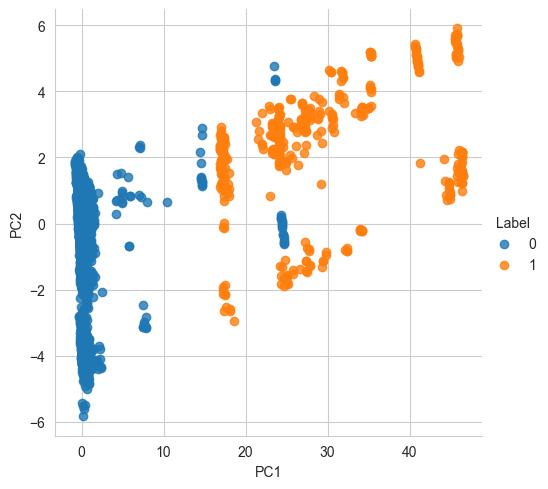

In [45]:
scatterPlot(X_train_pca, y_train)

Sur le scatter plot des composantes principales premières, les données sont non discrimantes pour la détection.

En utilisant l'analyse ACP, nous avons réussi à compresser les données de 30 variables à 10 variables et avons calculé le score de reconstruction. L'histogramme de ce score est présenté ci-dessous

In [46]:
reconstruction_score = []

for idx in X_train.index:
    score = mean_squared_error(X_train.loc[idx], X_train_pca_inverse.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_train.index, columns=['reconstruction_score'])

In [47]:
rc_scores.head()

,reconstruction_score
68806,0.982910
40018,0.243672
250360,0.511063
234820,0.232040
10001,0.479218


In [48]:
rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()

rc_scores_sorted = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores_sorted[(rc_scores_sorted > (rec_median + 2*rec_std))].dropna().index
train_fraud_index = list(y_train[y_train == 1].index)

rc_scores_sorted.head()

,reconstruction_score
145022,243.410742
220212,208.128792
23128,156.148155
91896,152.821910
219640,134.605749


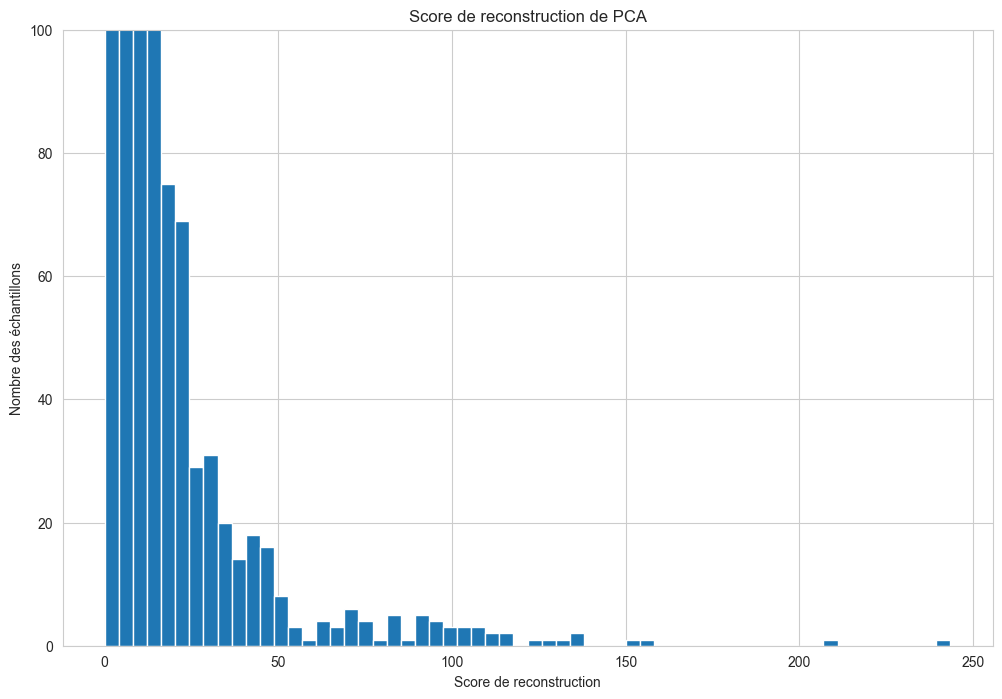

In [49]:
plt.figure(figsize=(12, 8))
rc_scores_sorted['reconstruction_score'].hist(bins=60)
plt.ylim(0, 100)
plt.title('Score de reconstruction de PCA')
plt.xlabel('Score de reconstruction')
plt.ylabel('Nombre des échantillons')
plt.show()

#### 4.3. Composantes PCA égale au nombre original de la dimension: `n_components=1`

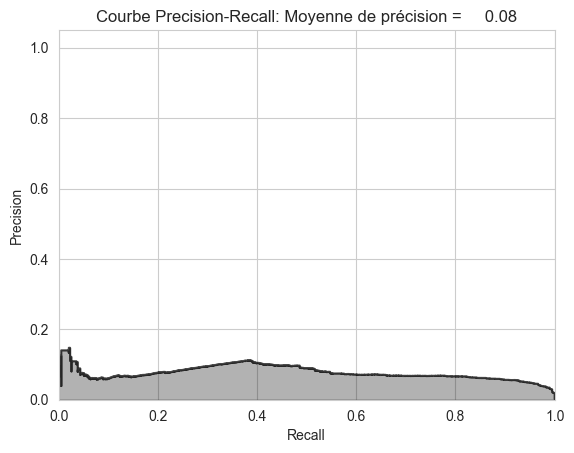

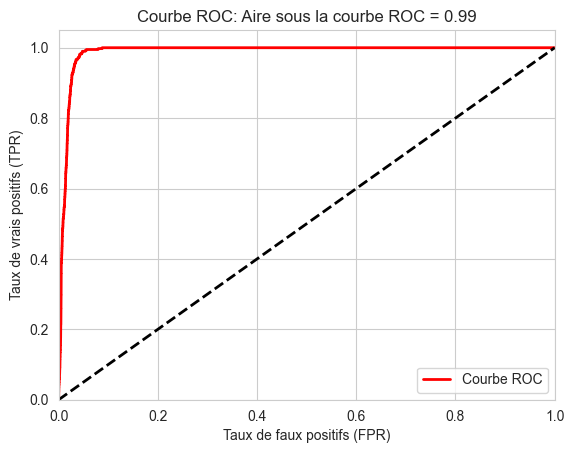

In [50]:
n_components = 1
random_state = 0

pca = PCA(n_components=n_components, random_state=random_state)

X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)

X_train_pca_inverse = pca.inverse_transform(X_train_pca)
X_train_pca_inverse = pd.DataFrame(data=X_train_pca_inverse, index=X_train.index)

anomalyScores = anomaly_scores(X_train, X_train_pca_inverse)
preds = plotResults(y_train, anomalyScores, True)


#### 4.4. Composantes PCA égale au nombre original de la dimension: `n_components=20`

In [51]:
n_components = 20
random_state = 0

pca = PCA(n_components=n_components, random_state=random_state)

X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)

X_train_pca_inverse = pca.inverse_transform(X_train_pca)
X_train_pca_inverse = pd.DataFrame(data=X_train_pca_inverse, index=X_train.index)

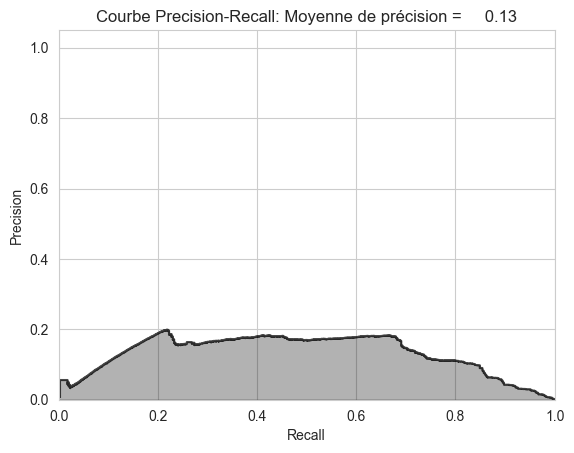

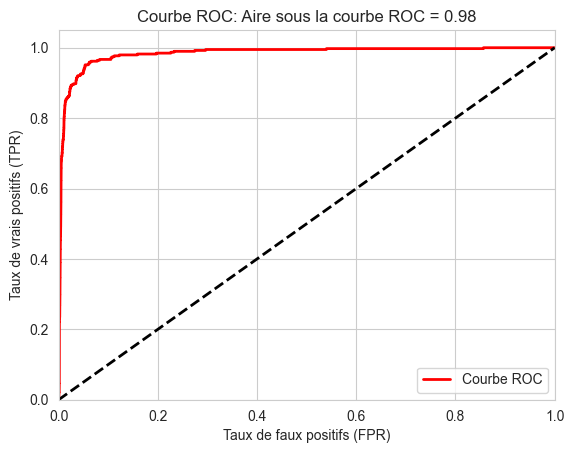

In [52]:
anomalyScores = anomaly_scores(X_train, X_train_pca_inverse)
preds = plotResults(y_train, anomalyScores, True)

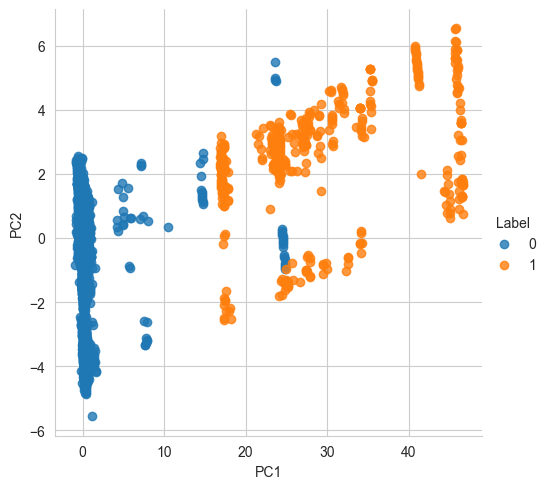

In [53]:
scatterPlot(X_train_pca, y_train)

#### 4.5. Composantes PCA égale au nombre original de la dimension: `n_components=25`

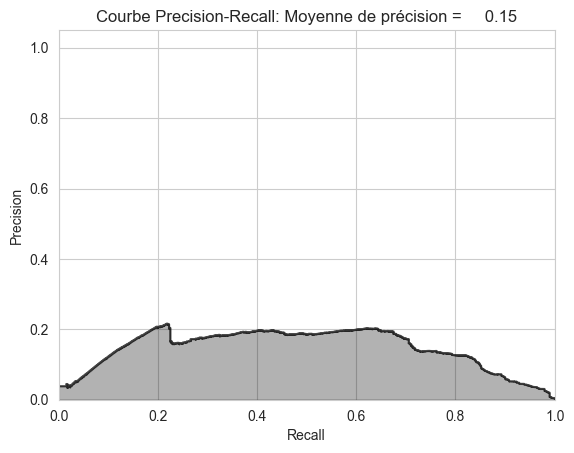

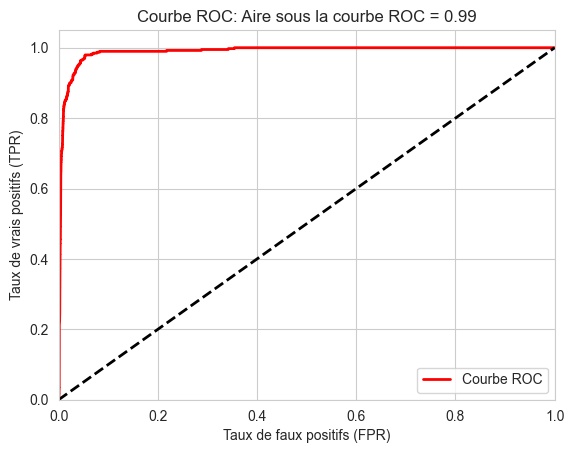

In [54]:
n_components = 25
random_state = 0

pca = PCA(n_components=n_components, random_state=random_state)

X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)

X_train_pca_inverse = pca.inverse_transform(X_train_pca)
X_train_pca_inverse = pd.DataFrame(data=X_train_pca_inverse, index=X_train.index)

anomalyScores = anomaly_scores(X_train, X_train_pca_inverse)
preds = plotResults(y_train, anomalyScores, True)

#### 4.6. ACP à noyaux

In [55]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

n_components =  15
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’}, default=’linear’
kernel = 'rbf'
gamma = None
fit_inverse_transform = True
random_state = 0
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, 
                      kernel=kernel, 
                      gamma=gamma, fit_inverse_transform=fit_inverse_transform, 
                      n_jobs=n_jobs,
                      random_state=random_state)

kernelPCA.fit(X_train.iloc[:2000])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA, index=X_train.index)

X_train_kernelPCA_inverse = kernelPCA.inverse_transform(X_train_kernelPCA)
X_train_kernelPCA_inverse = pd.DataFrame(data=X_train_kernelPCA_inverse, index=X_train.index)

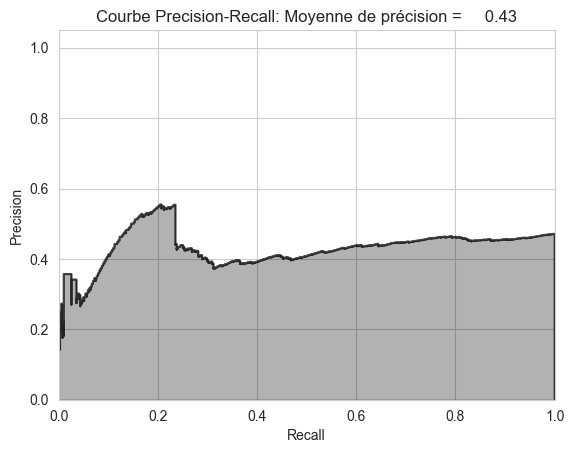

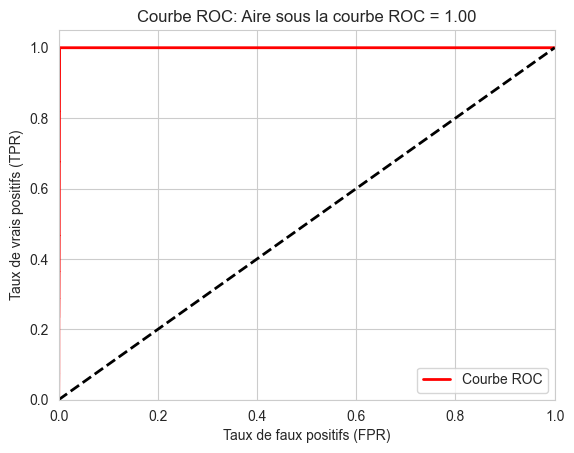

In [56]:
anomalyScoresKernelPCA = anomaly_scores(X_train, X_train_kernelPCA_inverse)
df_preds = plotResults(y_train, anomalyScoresKernelPCA, True)

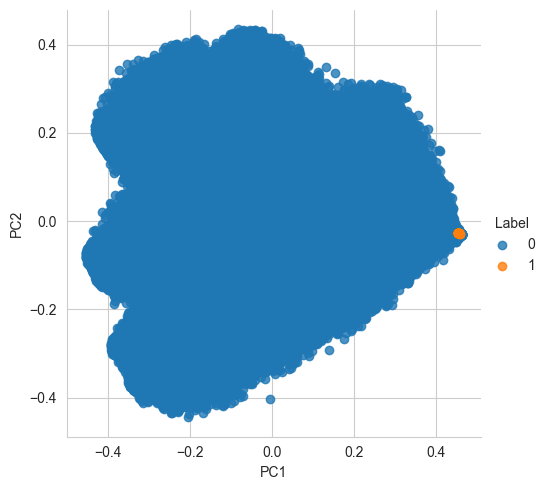

In [57]:
scatterPlot(X_train_kernelPCA, y_train)

# 5. Choix du meilleur nombre de composantes

In [58]:
scores = []
for n in range(2, 31):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_pca = pca.fit_transform(X_train)
    X_train_pca_inverse = pca.inverse_transform(X_train_pca)
    
    scores.append(mean_squared_error(X_train, X_train_pca_inverse))
scores = np.array(scores)
print(scores.argmin())

28


In [59]:
# scores_ = []
# for n in range(2, 31):
    # pca = PCA(n_components=n)
    # pca.fit(X_train)
    # X_train_pca = pca.fit_transform(X_train)
    # X_train_pca_inverse = pca.inverse_transform(X_train_pca)
    
    # scores_.append(anomaly_scores(X_train, X_train_pca_inverse).mean())

# scores_ = np.array(scores_) 
# scores_ = scores_.mean(axis=1)
# print(scores_.argmin())

In [60]:
n_components = 28
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train)
X_train_pca_inverse = pca.inverse_transform(X_train_pca)

X_train_pca_inverse = pd.DataFrame(X_train_pca_inverse, columns=X_train.columns, index=X_train.index)

In [61]:
reconstruction_score = []

for idx in X_train.index:
    score = mean_squared_error(X_train.loc[idx], X_train_pca_inverse.loc[idx])
    reconstruction_score.append(score)
    
rc_scores = pd.DataFrame(reconstruction_score, index=X_train.index, columns=['reconstruction_score'])

rec_mean = rc_scores['reconstruction_score'].mean()
rec_median = rc_scores['reconstruction_score'].median()
rec_std = rc_scores['reconstruction_score'].std()

rc_scores = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx = rc_scores[(rc_scores > (rec_median + 2*rec_std))].dropna().index
train_fraud_index = list(y_train[y_train == 1].index)

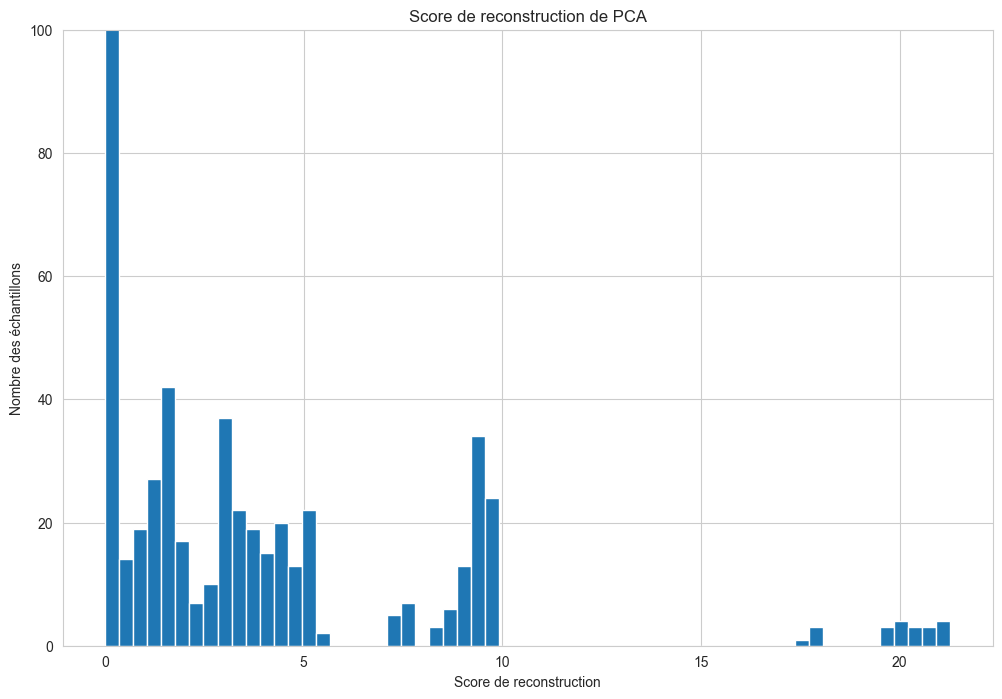

In [62]:
plt.figure(figsize=(12, 8))
rc_scores['reconstruction_score'].hist(bins=60)
plt.ylim(0, 100)
plt.title('Score de reconstruction de PCA')
plt.xlabel('Score de reconstruction')
plt.ylabel('Nombre des échantillons')
plt.show()

In [63]:
pred = pd.DataFrame(index=X_train.index)
pred['fraud'] = 0
pred.head()

,fraud
68806,0
40018,0
250360,0
234820,0
10001,0


In [64]:
top_scores_idx

Int64Index([ 10620,  10681,  10783,  10906,  12030,  12156,  12229,  12938,
             13394,  13405,
            ...
            274468,  47802,   6734,  30100, 262560, 218042, 191296, 204601,
              6899, 263274],
           dtype='int64', length=392)

In [65]:
for index in top_scores_idx:
    pred['fraud'].loc[index] = 1

print(classification_report(y_train, pred['fraud']))
print('Taux de transactions à investiguer:', len(top_scores_idx) / len(X_train) * 100, '%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227454
           1       0.84      0.84      0.84       391

    accuracy                           1.00    227845
   macro avg       0.92      0.92      0.92    227845
weighted avg       1.00      1.00      1.00    227845

Taux de transactions à investiguer: 0.1720467861923676 %


In [66]:
## 5.2 Évalution sur X_test

In [67]:
X_test_pca = pca.fit_transform(X_test)
X_test_pca_inverse = pca.inverse_transform(X_test_pca)

X_test_pca_inverse = pd.DataFrame(X_test_pca_inverse, columns=X_test.columns, index=X_test.index)

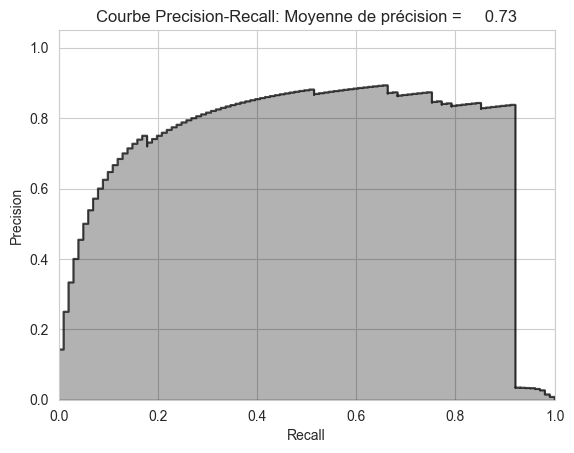

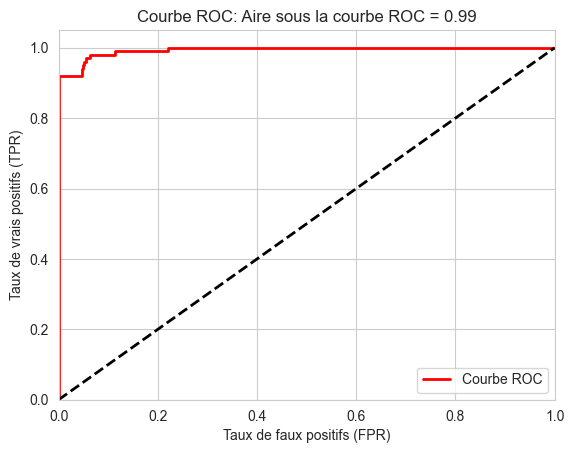

In [68]:
anomalyScoresPCA = anomaly_scores(X_test, X_test_pca_inverse)
df_preds_test = plotResults(y_test, anomalyScoresPCA, True)

In [69]:
reconstruction_score_test = []
for idx in X_test.index:
    score = mean_squared_error(X_test.loc[idx], X_test_pca_inverse.loc[idx])
    reconstruction_score_test.append(score)
    
rc_scores_test = pd.DataFrame(reconstruction_score_test, index=X_test.index, columns=['reconstruction_score'])

rec_mean_test = rc_scores_test['reconstruction_score'].mean()
rec_median_test = rc_scores_test['reconstruction_score'].median()
rec_std_test = rc_scores_test['reconstruction_score'].std()

rc_scores_test = rc_scores.sort_values(by='reconstruction_score', ascending=False)

top_scores_idx_test = rc_scores_test[(rc_scores_test > (rec_median_test + 2*rec_std_test))].dropna().index
val_fraud_index_test = list(y_test[y_test == 1].index)

In [70]:
pred_test = pd.DataFrame(index=X_test.index)
pred_test['fraud'] = 0
for index in top_scores_idx:
    pred_test['fraud'].loc[index] = 1
    
print(classification_report(y_test, pred_test['fraud']))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



# 6. Visualisation avec TSNE

## 6.1 Données $X_{train}$

In [71]:
X_pca_tsne_train = pca.fit_transform(X_train)
X_pca_tsne_train = pd.DataFrame(X_pca_tsne_train, index=X_train.index)

X_pca_tsne_train['Class'] = y_train
ok_samples_train = X_pca_tsne_train[X_pca_tsne_train['Class'] == 0].sample(2000)
df_fraud_train = X_pca_tsne_train[X_pca_tsne_train['Class'] == 1]

In [72]:
ok_samples_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,Class
55808,-0.038228,-0.206145,0.286349,-0.241654,0.103196,-1.324145,-0.271585,0.293941,-0.622196,0.590493,-0.058183,-0.099703,-1.504319,-0.415706,-0.189285,-2.207284,-1.660914,0.488062,-0.014727,-1.163720,1.854053,0.271916,-0.849272,1.737338,-0.029725,-0.387961,-0.090913,-0.119404,0
171237,-0.076261,-0.327442,-0.235217,-0.371251,0.181816,0.676370,-0.298335,-1.187491,-0.520883,1.517263,0.400241,-0.030286,0.108954,-0.611808,0.431205,0.352068,1.286402,-0.395642,1.000081,-0.696615,-0.483301,-0.916797,0.279640,0.547349,-0.155492,-0.266437,-0.344692,-0.153611,0
207554,0.066240,-0.086333,-2.372800,-1.097562,1.667502,1.263974,-0.621119,-1.397510,1.408047,-1.189371,1.161500,0.420833,-1.259176,-0.198138,-0.102970,0.190213,0.407607,4.062641,1.145767,-2.362345,-1.748201,1.855601,-0.741626,0.967815,-0.770279,0.056365,-0.556207,-1.288326,0
134615,-0.166988,1.184078,0.011301,-0.092344,-0.285110,-0.479925,0.053208,1.056823,0.013713,-0.832014,1.518667,-0.488660,-0.863584,0.330067,-0.248223,-0.946572,-1.718212,-0.184715,-0.790354,0.286572,-1.355765,-0.659628,-1.945972,2.305486,-0.859772,0.194281,0.112403,0.019938,0
146527,0.121068,-1.632395,0.677897,3.143419,1.069073,0.891062,0.144701,0.524483,-0.607093,0.078073,0.685676,-1.379722,-0.980930,0.028671,-0.364401,0.158774,-0.071348,-0.684818,0.933561,0.568910,-1.571483,-1.366605,0.029520,0.845915,2.685016,-1.099477,1.441676,-0.912881,0


In [73]:
ok_samples_train.shape

(2000, 29)

In [74]:
df_fraud_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,Class
119781,31.793810,4.209474,-0.906894,0.760964,-2.888620,2.310938,-1.928594,-0.388978,-0.566836,-0.246441,-0.388246,-2.757844,-0.694938,1.479346,1.273228,1.078516,2.095299,-2.523452,-2.112990,-4.072651,1.034544,1.479026,0.257203,1.408512,2.686354,1.585324,1.074687,0.490696,1
96341,16.987226,2.238866,-0.396765,0.450182,-0.399697,-0.422534,0.541188,0.238596,-0.542783,0.386674,-0.710854,0.917136,-1.641740,-1.746940,-0.079659,-0.828462,-0.949213,-0.789297,0.916113,-0.131069,0.946126,-0.403925,-1.223431,-0.181906,0.048763,0.063475,-0.052496,0.222341,1
6774,29.429148,-0.843130,-1.403319,0.824144,-2.730681,1.340421,-0.528380,1.959179,-0.464972,0.813315,0.498577,2.974344,0.290920,1.368299,-0.091471,1.538280,-0.502755,-2.875859,1.582638,-1.849095,0.672849,1.156767,-0.013392,1.214536,0.810850,-0.880930,-0.604824,0.026924,1
58761,17.090131,1.754756,-0.601464,0.349857,-0.885509,0.142678,0.552999,0.923562,0.540879,-1.005805,0.128430,0.688817,-0.401735,-0.223493,-0.063139,-1.076047,-2.287507,-0.415759,-0.959683,1.362317,-1.146663,-0.736053,-0.808325,0.323320,-0.108054,0.062886,-0.021338,0.297669,1
176049,17.078347,1.057031,0.086510,6.340673,3.121189,0.564620,-1.857438,-0.097405,-1.262538,-0.425089,-0.275772,1.124577,0.471003,2.851002,0.855160,-1.283368,-0.031194,0.426836,-0.149655,1.052836,2.175321,-1.374239,0.291281,1.910557,-1.085640,3.368480,0.455762,0.003646,1


In [75]:
df_fraud_train.shape

(391, 29)

In [76]:
df_tsne_train = pd.concat([ok_samples_train, df_fraud_train], ignore_index=True)
df_tsne_train.shape

(2391, 29)

In [77]:
X_tsne_train = df_tsne_train.values
y_tsne_train = df_tsne_train["Class"].values

tsne_train = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne_train = tsne_train.fit_transform(X_tsne_train)

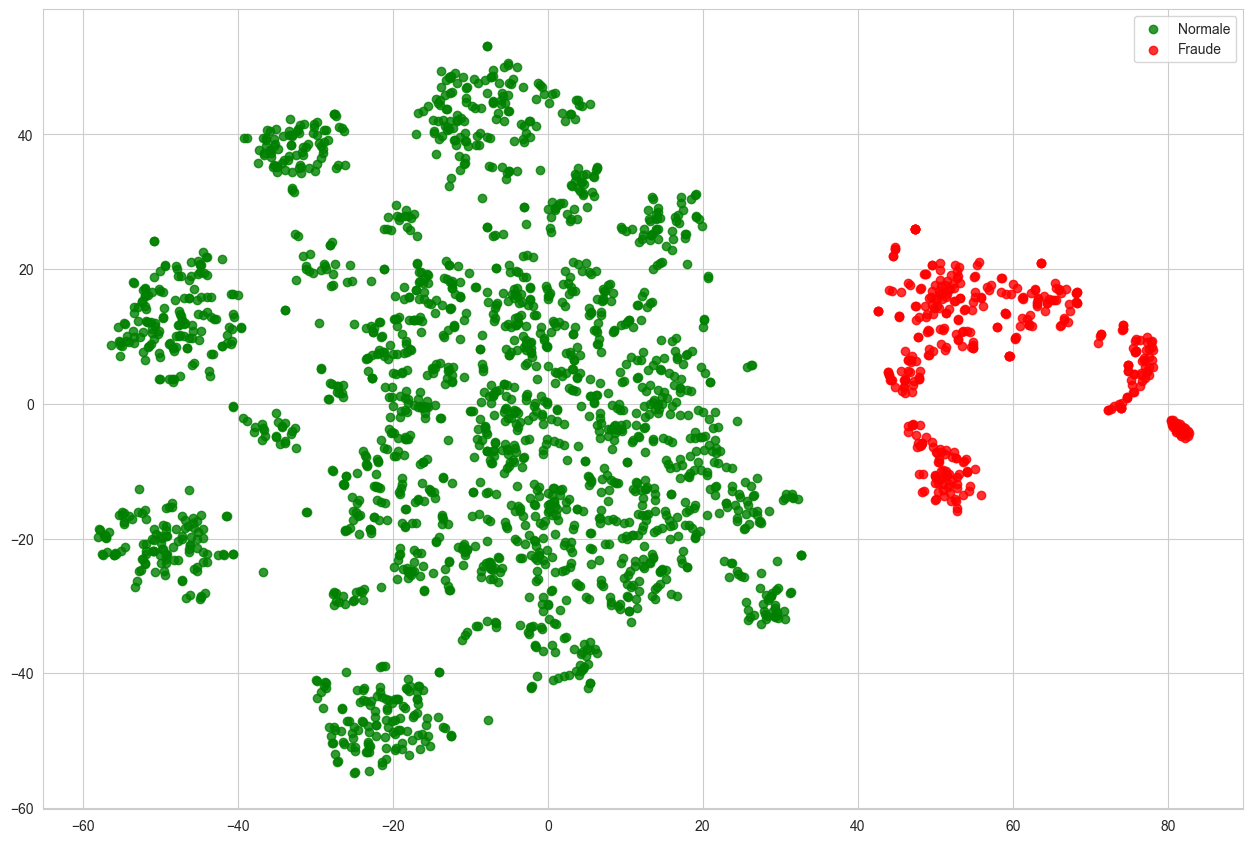

In [78]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])

ax.scatter(X_tsne_train[np.where(y_tsne_train == 0), 0], X_tsne_train[np.where(y_tsne_train == 0), 1],
           marker='o', color='g', linewidth=1, alpha=0.8, label='Normale')
ax.scatter(X_tsne_train[np.where(y_tsne_train == 1), 0], X_tsne_train[np.where(y_tsne_train == 1), 1],
           marker='o', color='r', linewidth=1, alpha=0.8, label='Fraude')
ax.legend(loc='best')
plt.show()

## 6.2. Données $X_{test}$

In [79]:
# test set 
X_pca_tsne_test = pca.fit_transform(X_test)
X_pca_tsne_test = pd.DataFrame(X_pca_tsne_test, index=X_test.index)

X_pca_tsne_test['Class'] = y_test
ok_samples_test = X_pca_tsne_test[X_pca_tsne_test['Class'] == 0].sample(2000)
df_fraud_test = X_pca_tsne_test[X_pca_tsne_test['Class'] == 1]

df_tsne_test = pd.concat([ok_samples_test, df_fraud_test], ignore_index=True)

X_tsne_test = df_tsne_test.values
y_tsne_test = df_tsne_test["Class"].values

tsne_test = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsn_test = tsne_test.fit_transform(X_tsne_test)

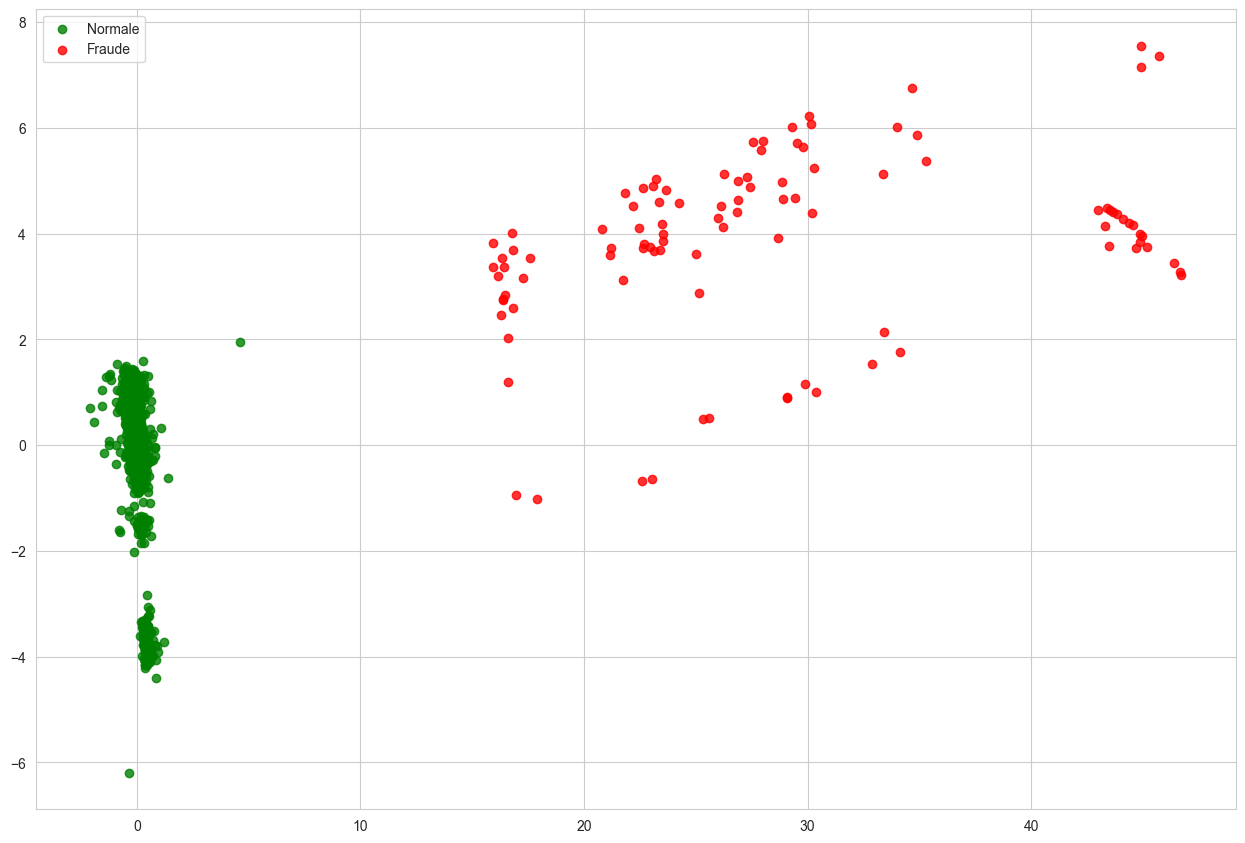

In [80]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])

ax.scatter(X_tsne_test[np.where(y_tsne_test == 0), 0], X_tsne_test[np.where(y_tsne_test == 0), 1],
           marker='o', color='g', linewidth=1, alpha=0.8, label='Normale')
ax.scatter(X_tsne_test[np.where(y_tsne_test == 1), 0], X_tsne_test[np.where(y_tsne_test == 1), 1],
           marker='o', color='r', linewidth=1, alpha=0.8, label='Fraude')
ax.legend(loc='best')
plt.show()